# Problem 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
sns.set(color_codes=True)

In [2]:
df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df.shape

(1525, 9)

In [9]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
df.duplicated().sum()

8

In [11]:
df[df.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [12]:
print(df['vote'].nunique())
print(df['vote'].value_counts().sort_values())

2
Conservative     462
Labour          1063
Name: vote, dtype: int64


In [13]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [14]:
def UnivariateAnalysis_numeric(column, nbins):
    print("Description of "+column)
    print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-")
    print(df[column].describe())
    
    plt.figure()
    print("Distribution of " + column)
    print('-+-+-+-+-+-+-+-+-+-+-+-+-+-+-')
    sns.distplot(df[column], kde=True, color='black');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print('-+-+-+-+-+-+-+-+-+-+-+-+-+-+-')
    ax = sns.boxplot(x=df[column])
    plt.show()


Description of age
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64
Distribution of age
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


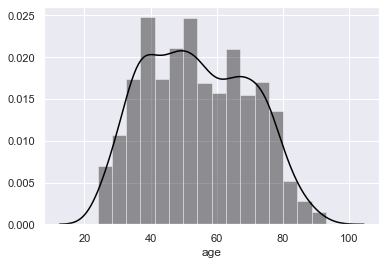

Boxplot of age
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


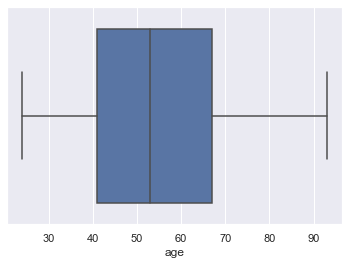

Description of economic.cond.national
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64
Distribution of economic.cond.national
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


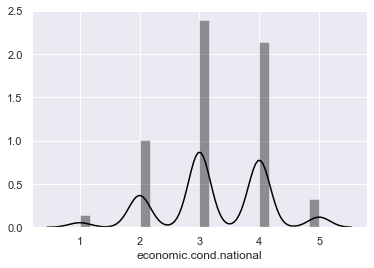

Boxplot of economic.cond.national
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


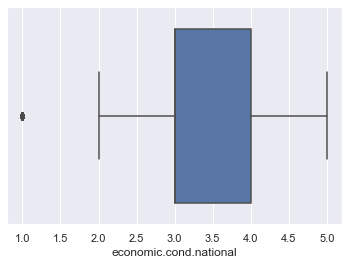

Description of economic.cond.household
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64
Distribution of economic.cond.household
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


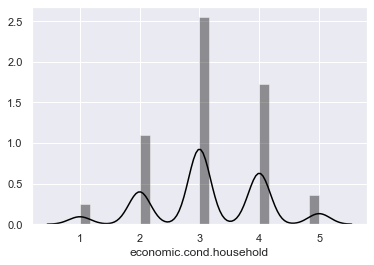

Boxplot of economic.cond.household
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


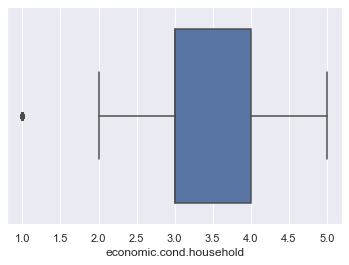

Description of Blair
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64
Distribution of Blair
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


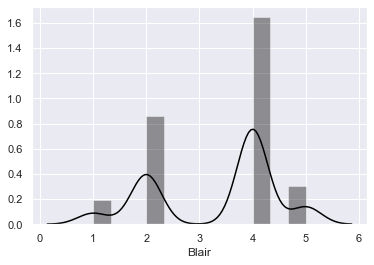

Boxplot of Blair
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


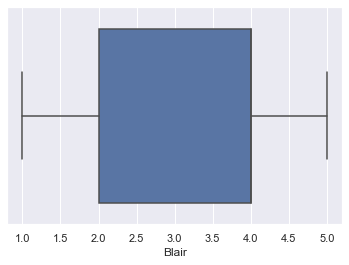

Description of Hague
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64
Distribution of Hague
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


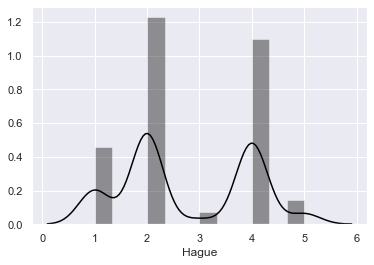

Boxplot of Hague
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


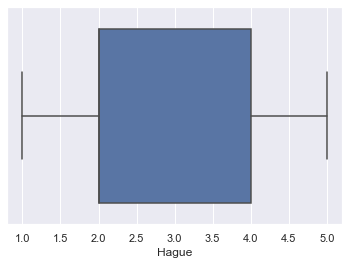

Description of Europe
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64
Distribution of Europe
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


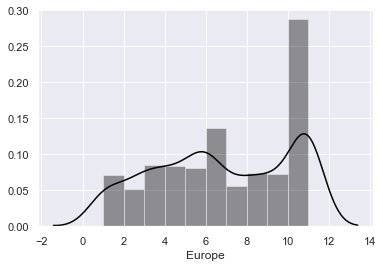

Boxplot of Europe
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


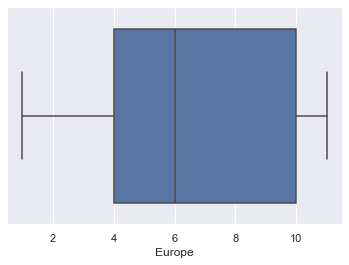

Description of political.knowledge
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64
Distribution of political.knowledge
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


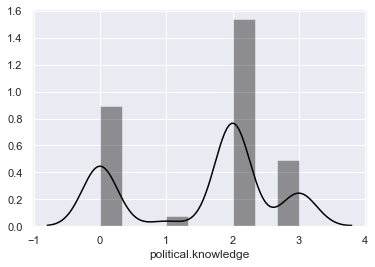

Boxplot of political.knowledge
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


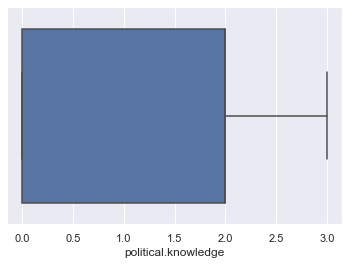

In [15]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:    UnivariateAnalysis_numeric(x,16)

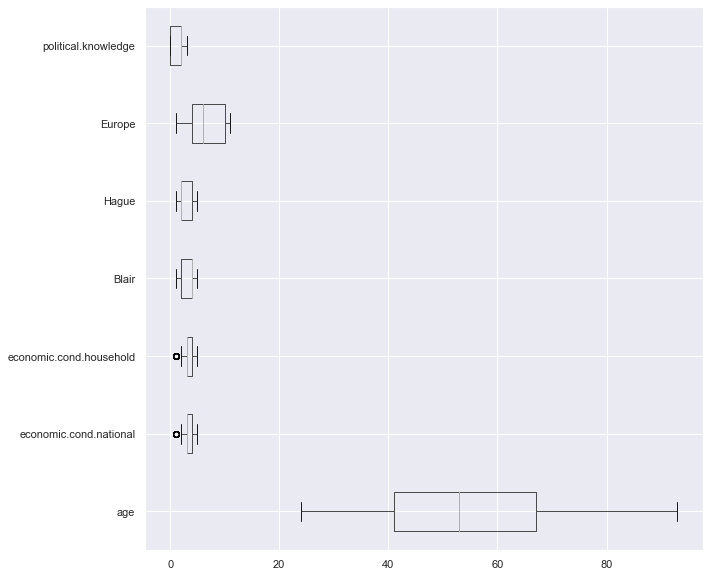

In [16]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)

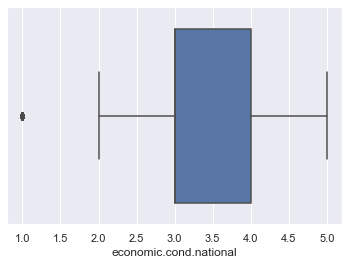

In [17]:
sns.boxplot(df['economic.cond.national'])

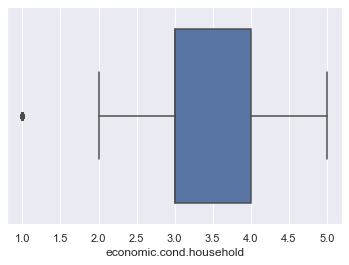

In [18]:
sns.boxplot(df['economic.cond.household'])

In [19]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

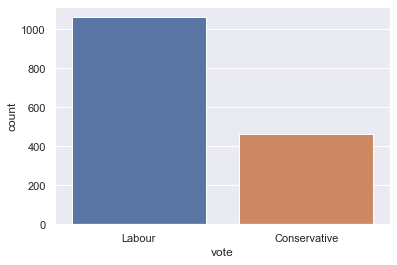

In [20]:
sns.countplot(df['vote'])

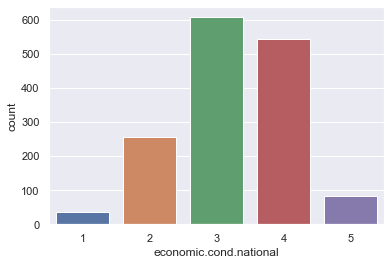

In [21]:
sns.countplot(df['economic.cond.national'])

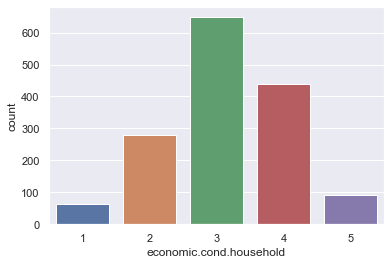

In [22]:
sns.countplot(df['economic.cond.household'])

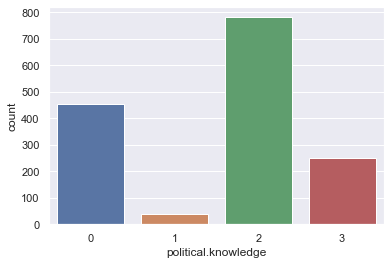

In [23]:
sns.countplot(df['political.knowledge'])

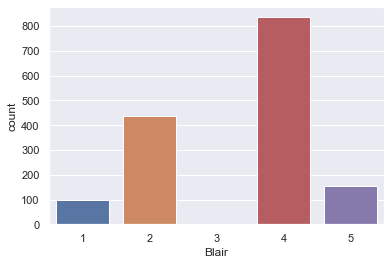

In [24]:
sns.countplot(df['Blair'])

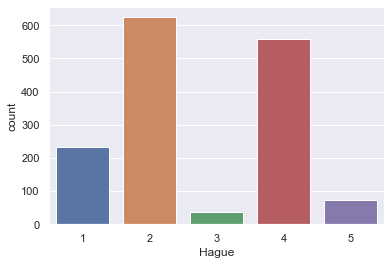

In [25]:
sns.countplot(df['Hague'])

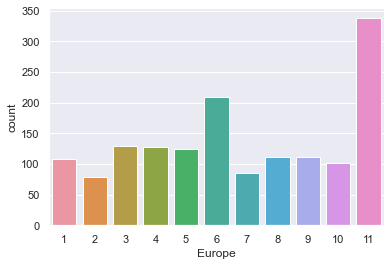

In [26]:
sns.countplot(df['Europe'])

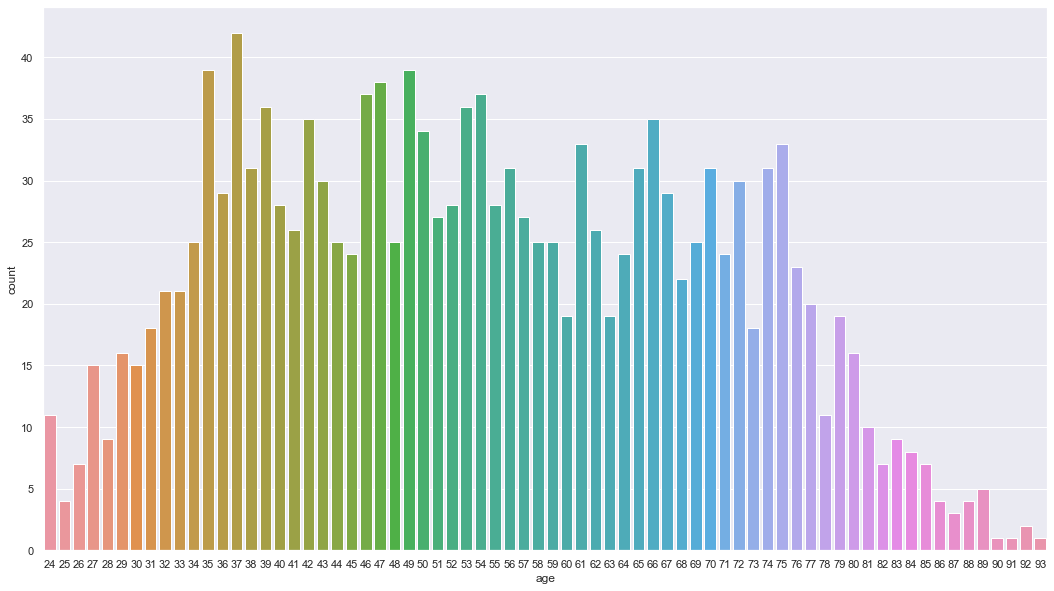

In [27]:
plt.figure(figsize=(18,10))
sns.countplot(df['age'])

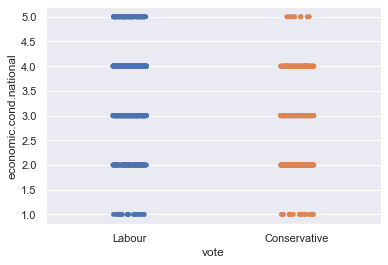

In [28]:
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

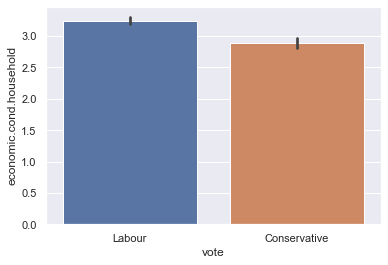

In [29]:
sns.barplot(df["vote"], df['economic.cond.household'])

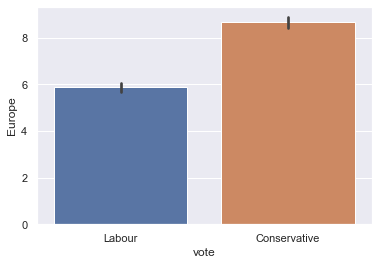

In [30]:
sns.barplot(df["vote"], df['Europe'])

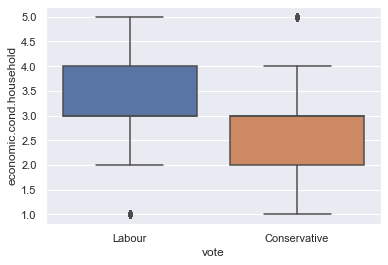

In [31]:
sns.boxplot(df["vote"], df['economic.cond.household'])

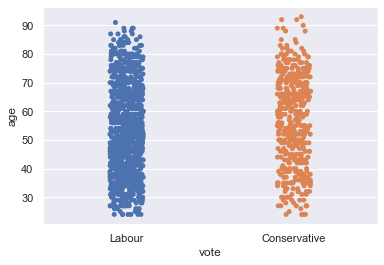

In [32]:
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

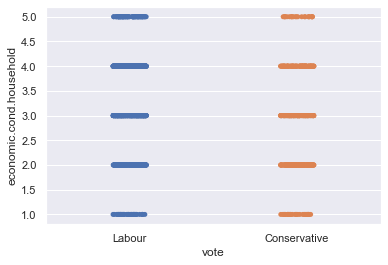

In [33]:
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

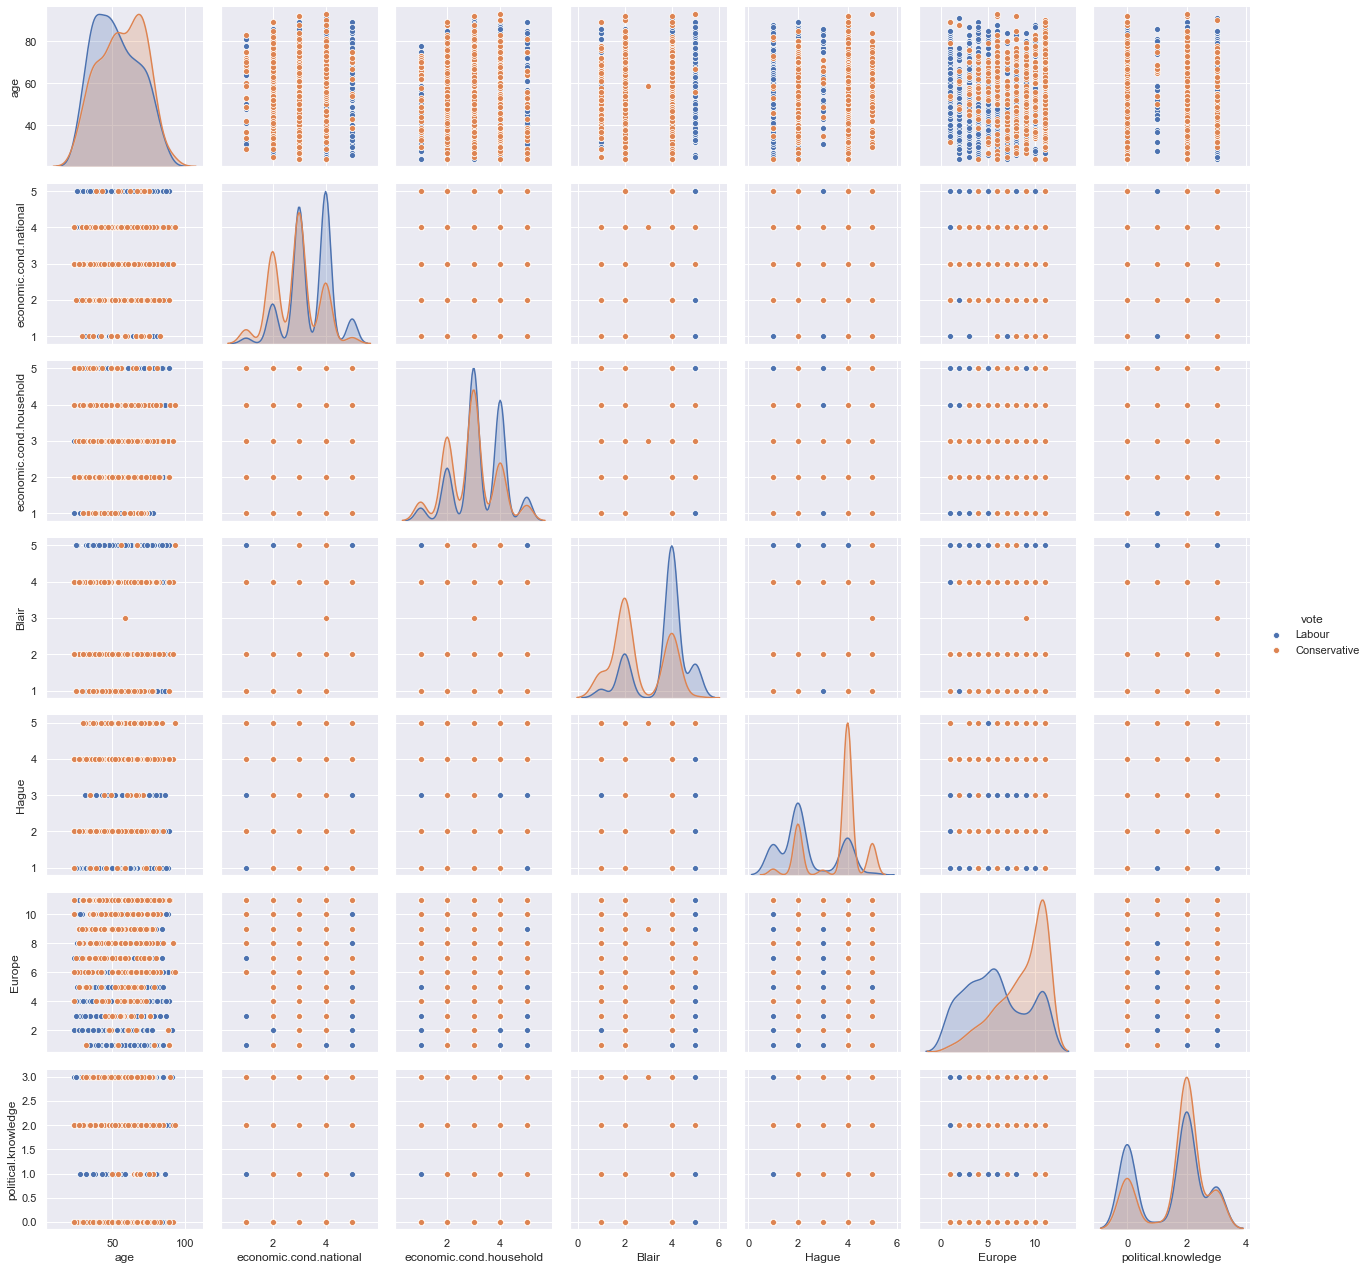

In [34]:
sns.pairplot(df, diag_kind='kde', hue='vote')

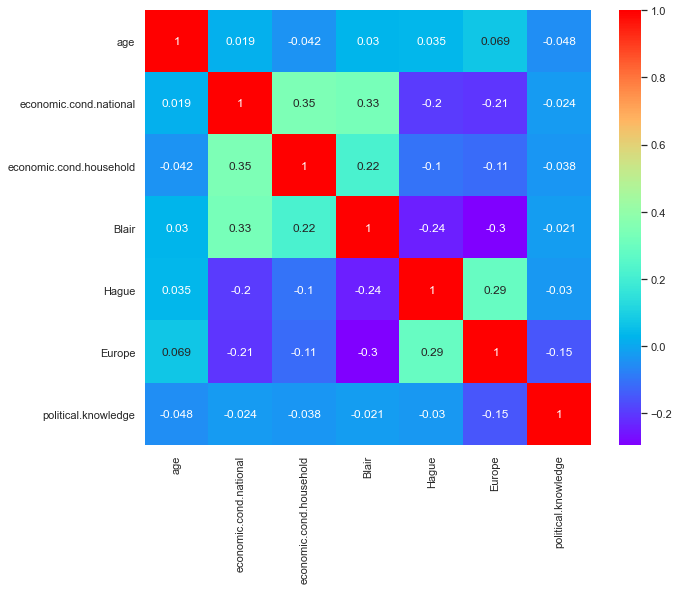

In [35]:
d_cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(d_cor, cmap='rainbow',annot=True)

## Encoding of the data

In [36]:
cat = ['vote', 'gender']
dfg =pd.get_dummies(df, columns=cat, drop_first=True)

In [37]:
dfg.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


# Naive Bayes

In [38]:
X=dfg.drop('vote_Labour',axis=1)
Y=dfg['vote_Labour']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [41]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [42]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)


0.8331771321462043


In [43]:
print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



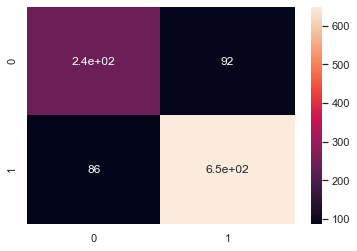

In [44]:
sns.heatmap(metrics.confusion_matrix(Y_train,Y_train_predict), annot=True)

In [45]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)

0.8253275109170306


In [46]:
print(metrics.confusion_matrix(Y_test,Y_test_predict))
print(metrics.classification_report(Y_test,Y_test_predict))

[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



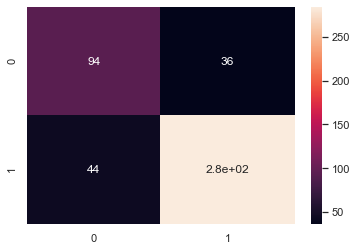

In [47]:
sns.heatmap(metrics.confusion_matrix(Y_test,Y_test_predict), annot=True)

# AUC-ROC curve for Naive Bayes

AUC train_score is: 0.886 


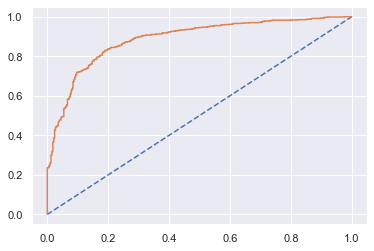

In [48]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
nb_train_auc=roc_auc_score(Y_train,probs_train)
print("AUC train_score is: %.3f " % nb_train_auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

AUc test_score is: 0.885 


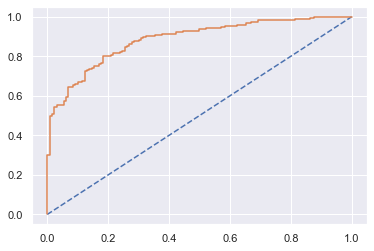

In [49]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
nb_test_auc=roc_auc_score(Y_test,probs_test)
print("AUc test_score is: %.3f " % nb_test_auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


# K-nearest neighbours

In [50]:
x=dfg.drop("vote_Labour",axis=1)

y=dfg["vote_Labour"]

In [51]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [52]:
from scipy.stats import zscore
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']].apply(zscore).head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=1)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)

0.8537956888472352


In [56]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[242  90]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



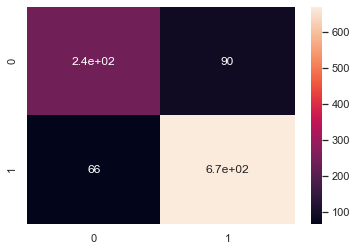

In [57]:
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True)

In [58]:
y_test_predict = KNN_model.predict(x_test)
KNN_model_score = KNN_model.score(x_test,y_test)
print(KNN_model_score)

0.7860262008733624


In [59]:
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



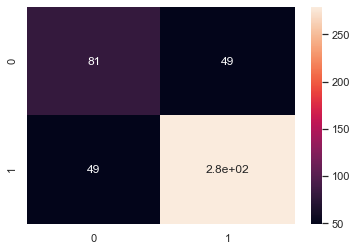

In [60]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True)

# AUC-ROC curve for KNN

AUC for train set is: 0.921 


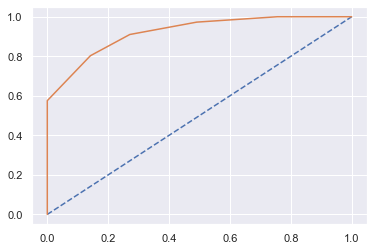

In [61]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
knn_train_auc=roc_auc_score(y_train,probs_train)
print("AUC for train set is: %.3f " % knn_train_auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

AUC for test set is: 0.835


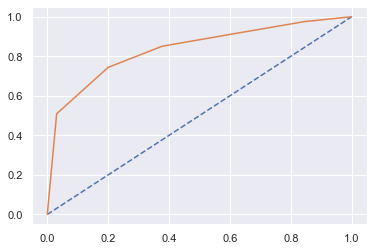

In [62]:
probs_test =KNN_model.predict_proba(x_test)
probs_test =probs_test[:,1]
knn_test_auc=roc_auc_score(y_test, probs_test)
print("AUC for test set is: %.3f" %knn_test_auc)

test_fpr,test_tpr, test_thresholds=roc_curve(y_test, probs_test)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

## k = 6

In [63]:
KNN_model=KNeighborsClassifier(n_neighbors=6)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [64]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)

0.8444236176194939


In [65]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[261  71]
 [ 95 640]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       332
           1       0.90      0.87      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.83      0.82      1067
weighted avg       0.85      0.84      0.85      1067



In [66]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)

0.777292576419214


In [67]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 89  41]
 [ 61 267]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.64       130
           1       0.87      0.81      0.84       328

    accuracy                           0.78       458
   macro avg       0.73      0.75      0.74       458
weighted avg       0.79      0.78      0.78       458



## k = 7

In [185]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [186]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)

0.8491096532333646


In [187]:
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[233  99]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       332
           1       0.87      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [188]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score = KNN_model.score(x_test, y_test)
print(KNN_model_score)

0.7860262008733624


In [189]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 77  53]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       130
           1       0.84      0.86      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.73      0.73       458
weighted avg       0.78      0.79      0.78       458



# Discriminant Analysis

In [73]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [74]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

0.8369259606373008


In [75]:
print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



Train AUC is: 0.889 


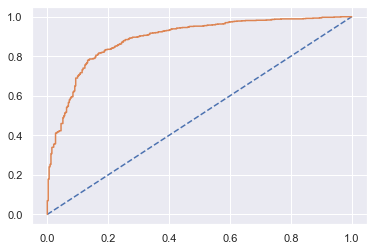

In [76]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
lda_train_auc=roc_auc_score(Y_train,probs_train)
print("Train AUC is: %.3f " % lda_train_auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [77]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

0.8187772925764192


In [78]:
print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Test AUC is: 0.884 


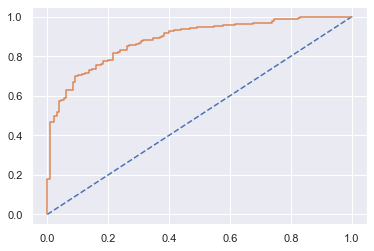

In [79]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
lda_test_auc=roc_auc_score(Y_test,probs_test)
print("Test AUC is: %.3f " % lda_test_auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
Logistic_model=LogisticRegression(solver='lbfgs',max_iter=10000, penalty='none',verbose=True)
Logistic_model.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, penalty='none', verbose=True)

In [81]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

0.8406747891283973


In [82]:
print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [83]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.616295,0.383705
1,0.186408,0.813592
2,0.187939,0.812061
3,0.163962,0.836038
4,0.052494,0.947506


AUC: 0.889


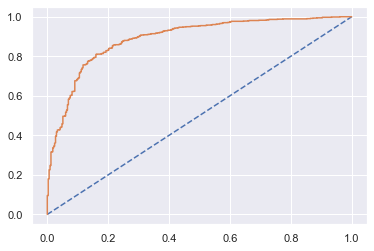

In [84]:
probs = Logistic_model.predict_proba(X_train)
probs = probs[:, 1]
lr_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % lr_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [85]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

0.8231441048034934


In [86]:
print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [87]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.933650,0.066350
1,0.689302,0.310698
2,0.333443,0.666557
3,0.477607,0.522393
4,0.157164,0.842836


AUC: 0.882


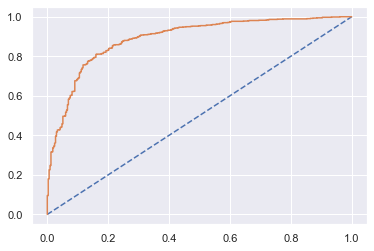

In [88]:
probs_test = Logistic_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
lr_test_auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % lr_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

# Model Tuning

In [150]:
#To remove the hyper-parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [151]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [152]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 100}

In [153]:
best_grid = grid_search.best_estimator_

In [154]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, random_state=0)

In [94]:
best_model = grid_search.best_estimator_

In [155]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [157]:
metrics.confusion_matrix(y_train,ytrain_predict)

array([[225, 107],
       [ 59, 676]], dtype=int64)

In [158]:
print(metrics.classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.83      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



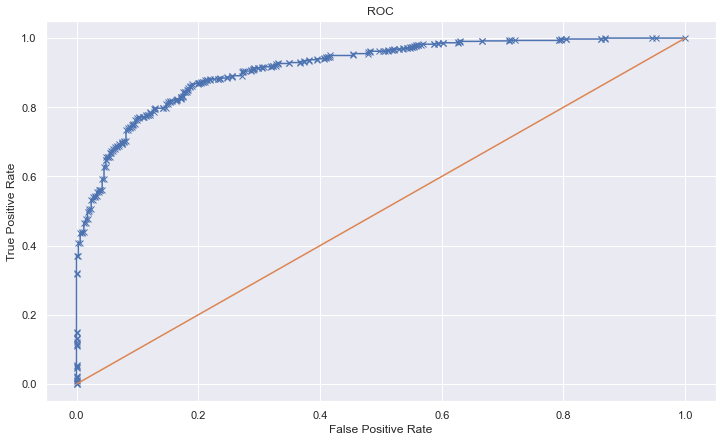

Area under Curve is 0.914855339726252


In [159]:
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

In [160]:
metrics.confusion_matrix(y_test,ytest_predict)

array([[ 78,  52],
       [ 37, 291]], dtype=int64)

In [161]:
print(metrics.classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       130
           1       0.85      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.76      0.74      0.75       458
weighted avg       0.80      0.81      0.80       458



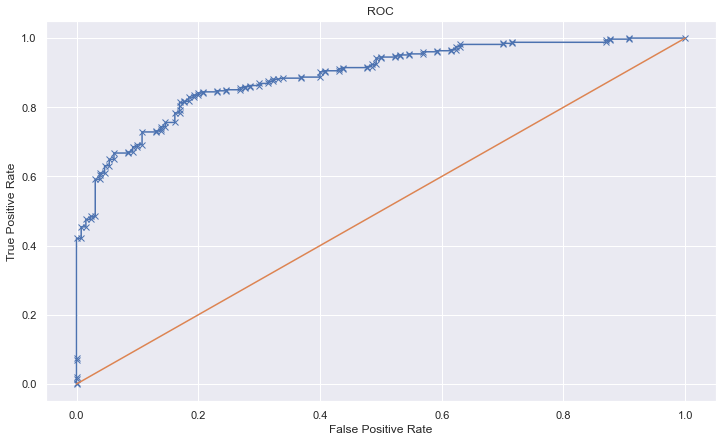

Area under Curve is 0.891076454033771


In [162]:
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

# Bagging

In [103]:
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [104]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [163]:
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=0),
                  n_estimators=100, random_state=1)

In [164]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)


0.9653233364573571


In [165]:
print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [166]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

0.8362445414847162


In [167]:
print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

[[ 92  38]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



# AUC-ROC curve for Bagging

AUC: 0.997


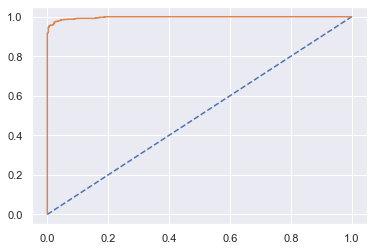

In [168]:
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.897


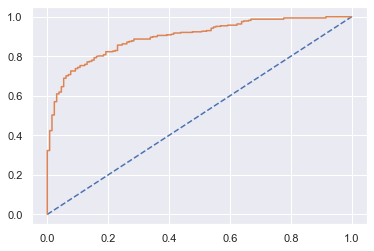

In [169]:
probs_test = Bagging_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

# AdaBoosting

In [170]:
from sklearn.ensemble import AdaBoostClassifier

In [171]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [172]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

0.8472352389878163


In [173]:
print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


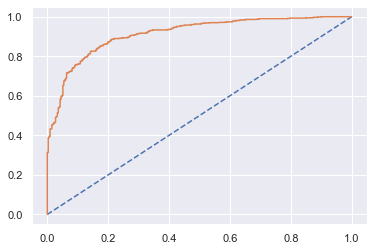

In [174]:
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [117]:
y_test_predict=ADB_model.predict(X_test)
ADB_model_score=ADB_model.score(X_test,Y_test)
print(ADB_model_score)

0.8187772925764192


In [118]:
print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.879


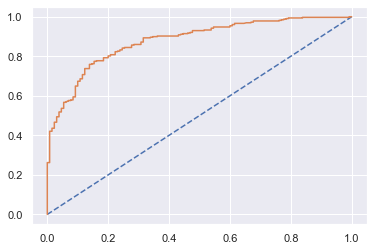

In [119]:
probs_test = ADB_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

# Gradient boosting

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [121]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)

0.8865979381443299


In [122]:
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



AUC: 0.950


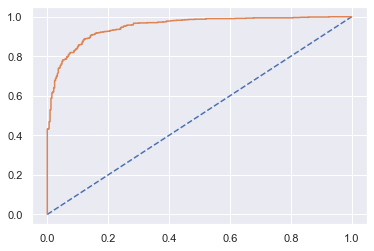

In [123]:
probs = gbc_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [124]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)

0.8318777292576419


In [125]:
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.904


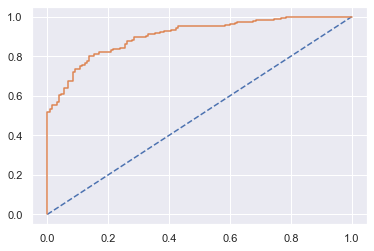

In [126]:
probs_test = gbc_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)

# Final Model

#### Naive Bayes

In [175]:
nb_metrics=metrics.classification_report(Y_train, Y_train_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_f1=round(df.loc["1"][2],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_precision=round(df.loc["1"][0],2)
nb_train_acc=round(best_model.score(X_train, Y_train),2)
print('nb_train_acc',nb_train_acc)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_acc 0.84
nb_train_precision  0.88
nb_train_recall  0.88
nb_train_f1  0.88


In [176]:
nb_metrics=metrics.classification_report(Y_test, Y_test_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_f1=round(df.loc["1"][2],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_precision=round(df.loc["1"][0],2)
nb_test_acc=round(best_model.score(X_test, Y_test),2)
print('nb_test_acc',nb_test_acc)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_acc 0.82
nb_test_precision  0.89
nb_test_recall  0.87
nb_test_f1  0.88


#### KNN

In [177]:
knn_metrics=metrics.classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_f1=round(df.loc["1"][2],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_precision=round(df.loc["1"][0],2)
knn_train_acc=round(best_model.score(x_train, y_train),2)
print('knn_train_acc',knn_train_acc)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_acc 0.84
knn_train_precision  0.88
knn_train_recall  0.91
knn_train_f1  0.89


In [178]:
knn_metrics=metrics.classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_f1=round(df.loc["1"][2],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_precision=round(df.loc["1"][0],2)
knn_test_acc=round(best_model.score(x_test, y_test),2)
print('knn_test_acc',knn_test_acc)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_acc 0.82
knn_test_precision  0.88
knn_test_recall  0.89
knn_test_f1  0.89


#### LR

In [179]:
lr_metrics=metrics.classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).T
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
lr_train_acc=round(best_model.score(X_train, y_train),2)
print('lr_train_acc',lr_train_acc)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_acc 0.84
lr_train_precision  0.86
lr_train_recall  0.92
lr_train_f1  0.89


In [180]:
lr_metrics=metrics.classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
lr_test_acc=round(best_model.score(X_test, y_test),2)
print('lr_test_acc',lr_test_acc)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_acc 0.82
lr_test_precision  0.85
lr_test_recall  0.89
lr_test_f1  0.87


#### LDA

In [181]:
lda_metrics=metrics.classification_report(Y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).T
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_acc=round(df.loc['1'][0],2)
print('lda_train_acc',lda_train_acc)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_acc 0.88
lda_train_precision  0.88
lda_train_recall  0.91
lda_train_f1  0.89


In [182]:
lda_metrics=metrics.classification_report(Y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).T
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=round(df.loc['1'][0],2)
print('lda_test_acc',lda_test_acc)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_acc 0.88
lda_test_precision  0.88
lda_test_recall  0.89
lda_test_f1  0.89


In [183]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    { 'NB Train': [nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
      'NB Test' : [nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
      'KNN Train' : [knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
      'KNN Test' : [knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,NB Train,NB Test,KNN Train,KNN Test,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.84,0.82,0.84,0.82,0.84,0.82,0.88,0.88
AUC,0.89,0.88,0.92,0.84,0.89,0.88,0.89,0.88
Recall,0.88,0.87,0.91,0.89,0.92,0.89,0.91,0.89
Precision,0.88,0.89,0.88,0.88,0.86,0.85,0.88,0.88
F1 Score,0.88,0.88,0.89,0.89,0.89,0.87,0.89,0.89


# Problem 2

In [136]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [137]:
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [138]:
import numpy as np
import pandas as pd
import random
import string

In [139]:
len(inaugural.words())

149797

In [140]:
inaugural.words()

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [141]:
len(inaugural.raw())

793313

In [142]:
inaugural.sents()

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [143]:
nltk.download('punkt')
len(inaugural.sents())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


5050

# Removing the stop words

In [144]:
nltk.download('stopwords')
word =inaugural.words()
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)



word_lower = (x.lower() for x in word)
word_clean = [word for word in word_lower if word not in stopwords]



word_freq = nltk.FreqDist(word_clean)


word_features = [item[0] for item in word_freq.most_common(2000)]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
len(word_clean)

64987

In [146]:
nltk.FreqDist(word_clean).most_common(10)

[('government', 600),
 ('people', 584),
 ('us', 478),
 ('upon', 371),
 ('must', 366),
 ('--', 363),
 ('great', 340),
 ('may', 338),
 ('world', 338),
 ('states', 333)]

In [147]:
word_graph=" ".join(word_features)

In [148]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Word Cloud (after cleaning)!!


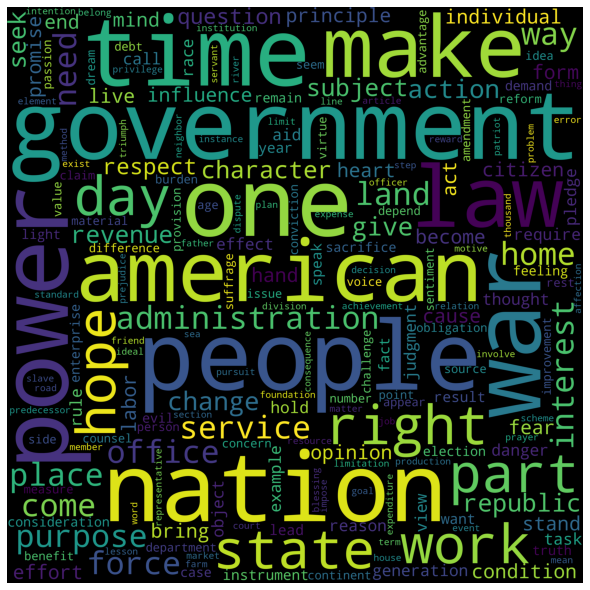

In [149]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(word_graph) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud (after cleaning)!!")
plt.show()